# Nghiên cứu tim Framingham

### Nội dung

#### 1. **Tải dữ liệu**
    - Nhập các gói thư viện
    - Đọc dữ liệu
    - Kiểm tra kích thước dữ liệu
    - Kiểm tra kiểu dữ liệu

#### 2. **Làm sạch dữ liệu & Phân tích khám phá dữ liệu (EDA)**
    - Kiểm tra giá trị Null
    - Bản đồ nhiệt tương quan
    - Điền giá trị Null
    - Thống kê mô tả
    - EDA (Gia đoạn 1)
    - Mã hóa trung bình
    - EDA (Gia đoạn 2)
    - Chuyển đổi logarith

#### 3. **Chuẩn hóa**
    - StandardScaler

#### 4. **Mô hình hóa**
    - Chia dữ liệu & Chọn thuật toán
    - Triển khai Hồi quy Logistic

#### 5. **Cải tiến mô hình**

#### 6. **Xây dựng ứng dụng**

### Chi tiết :

Bộ dữ liệu là một tập con khá nhỏ của bộ dữ liệu FHS, có 4240 quan sát và 16 biến. Các biến như sau:

- sex : giới tính của các quan sát. Biến là nhị phân được đặt tên là “male” trong bộ dữ liệu. (0 = "Nữ")
- age : Tuổi tại thời điểm khám sức khỏe bằng năm.
- education : Một biến phân loại về trình độ học vấn của người tham gia, với các mức: Một ít trung học phổ thông (1), trung học phổ thông/GED (2), một ít học cao đẳng/trường nghề (3), đại học (4)
- currentSmoker: Hút thuốc lá hiện tại tại thời điểm khám
- cigsPerDay: Số lượng điếu thuốc lá hàng ngày
- BPmeds: Sử dụng thuốc hạ huyết áp tại cuộc khám
- prevalentStroke: Đột quỵ phổ biến (0 = không mắc bệnh)
- prevalentHyp: Tăng huyết áp phổ biến. Người tham gia được xác định là bị tăng huyết áp nếu đang điều trị
- diabetes: Bệnh tiểu đường theo tiêu chí của cuộc khám đầu tiên được điều trị
- totChol: Tổng cholesterol (mg/dL)
- sysBP: Huyết áp tâm thu (mmHg)
- diaBP: Huyết áp tâm trương (mmHg)
- BMI: Chỉ số khối cơ thể, cân nặng (kg)/chiều cao (m)^2
- heartRate: Nhịp tim (nhịp/phút)
- glucose: Mức đường huyết (mg/dL)

Và cuối cùng là biến phản hồi: CHD: Bệnh tim mạch vành.


**Bảng câu hỏi :**

- Mỗi thuộc tính trong bộ dữ liệu có sự phân bố như thế nào?

- Chúng ta có thể lấy số lượng CHD theo giới tính không?

- Chúng ta có thể nhóm người ở độ tuổi nhất định lại và tìm hiểu huyết áp tâm thu và huyết áp tâm trương ảnh hưởng như thế nào theo nhóm tuổi?

- Biến mục tiêu của chúng ta được phân bố như thế nào? Nó có bị mất cân bằng không?


**Mục tiêu :**

- Mục tiêu là xây dựng một số mô hình dự đoán trên bộ dữ liệu FHS và xem xét một số kỹ thuật khám phá và mô hình hóa.

### Tải dữ liệu

In [44]:
#Nhập các gói thư viện

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
#Đọc dữ liệu

df = pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [46]:
#Kích thước dữ liệu

print ('Số trường dữ liệu :', df.shape[0], '\nSố đặc trưng : ', df.shape[1])

Số trường dữ liệu : 4240 
Số đặc trưng :  16


Chúng ta có thể thấy rằng tập dữ liệu của chúng ta chứa 4240 ví dụ / dự đoán và 16 đặc trưng (bao gồm cả mục tiêu).

In [47]:
#Thông tin dữ liệu

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  CHD              4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


- Dựa vào kết quả trên chúng ta có :
    - **(7) x int64** thuộc tính.
    - **(9) x float64** thuộc tính.

### Làm sạch dữ liệu và phân tích khám phá dữ liệu (EDA)

In [48]:
#Kiểm tra giá trị Null trong mỗi thuộc tính

df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
CHD                  0
dtype: int64

In [49]:
#Giá trị Null trong mỗi thuộc tính theo %

df.isnull().sum() / df.shape[0] * 100

male               0.000000
age                0.000000
education          2.476415
currentSmoker      0.000000
cigsPerDay         0.683962
BPMeds             1.250000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179245
sysBP              0.000000
diaBP              0.000000
BMI                0.448113
heartRate          0.023585
glucose            9.150943
CHD                0.000000
dtype: float64

- Chúng ta có thể thấy rằng chúng ta có các giá trị null trong các thuộc tính sau :<b>
    - education          (105) - 2.47%
    - cigsPerDay          (29) - 0.68%
    - BPMeds              (53) - 1.25%
    - totChol             (50) - 1.17%
    - BMI                 (19) - 0.44%
    - heartRate            (1) - 0.02%
    - glucose            (388) - 9.15%

<Axes: >

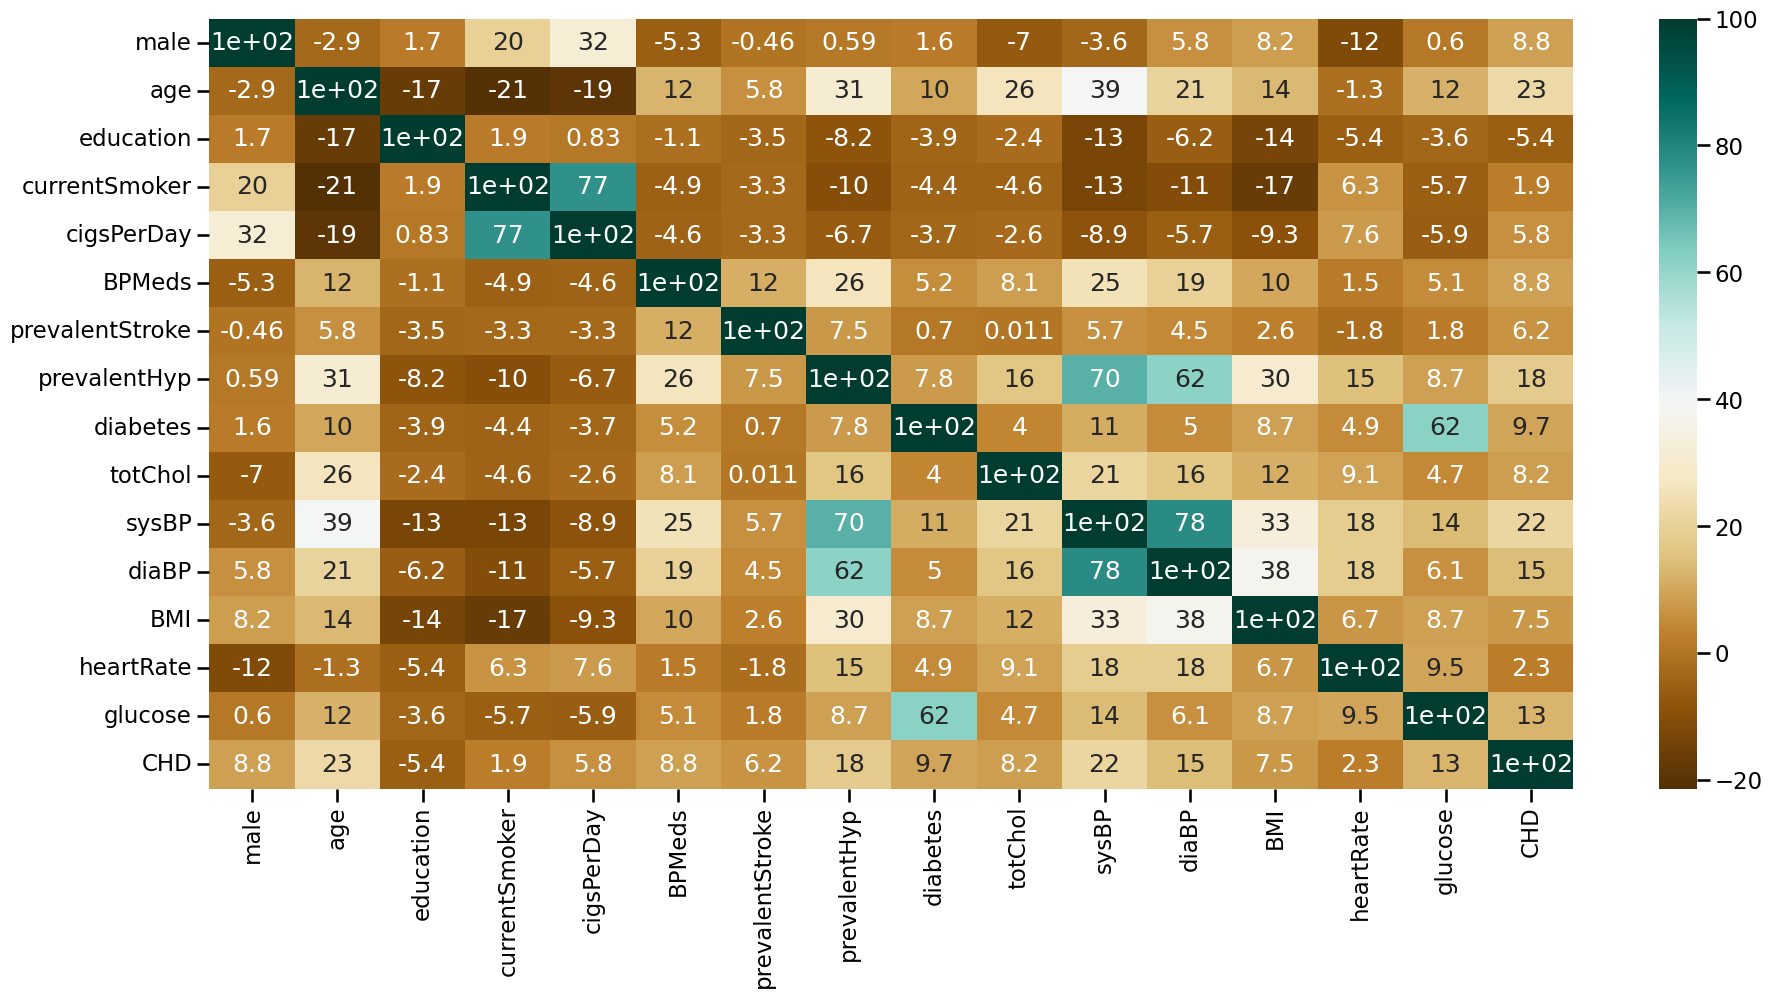

In [50]:
#Bản đồ nhiệt tương quan 

sns.set_context('talk')
plt.figure(figsize=(22,10))
sns.heatmap(df.corr()*100, annot=True, cmap='BrBG')

**Nhận xét :**

Đồ thị tương quan cung cấp cho chúng ta thông tin giá trị về mối quan hệ giữa các thuộc tính. Nó có thể là Âm, Dương hoặc Không có tương quan. Chúng ta luôn cần giữ lại một thuộc tính trong số hai thuộc tính có tương quan mạnh, nhưng vì chúng ta muốn thực hiện Phân tích khám phá dữ liệu (EDA), sẽ giữ tất cả và loại bỏ chúng trước khi mô hình hóa..

- **currentSmoker & cigsPerDay** có tương quan mạnh 77 (được chuẩn hóa để quan sát tốt hơn)


- **prevalentHyp vs sysBP / diaBP** có tương quan dương 70 và 62.


- Trong khi đó, **glucose & diabetes** cũng có tương quan dương.


- **sysBP & diaBP** cũng có tương quan dương.

**Thông thường, chúng ta điền các giá trị Null bằng các biện pháp xu hướng trung tâm (Trung bình / Trung vị / Mode) hoặc sử dụng các kỹ thuật như Forward / Backward fill. Tuy nhiên, trong trường hợp này, chúng ta có thể quan sát đồ thị tương quan và xem xét sử dụng nó để điền các giá trị thiếu. Ví dụ, chúng ta có tương quan dương giữa currentSmoker & cigsPerDay, chúng ta biết rằng currentSmoker có giá trị là 1 (là người hút thuốc) hoặc 0 (không hút thuốc), chúng ta có thể nhóm theo currentSmoker và điền các giá trị thiếu dựa trên Trung vị. Tương tự, chúng ta có thể làm cho BMI dựa trên giới tính (male) & tuổi tác.** 

In [51]:
#Điền giá trị trung bình vào các giá trị Null

def impute_median(data):
    return data.fillna(data.median())

In [52]:
#Điền trung vị vào các giá trị Null

df.glucose = df['glucose'].transform(impute_median)
df.education = df['education'].transform(impute_median)
df.heartRate = df['heartRate'].transform(impute_median)
df.totChol = df['totChol'].transform(impute_median)
df.BPMeds = df['BPMeds'].transform(impute_median)

## Nhóm theo các lớp có liên quan với các lớp khác

by_currentSmoker = df.groupby(['currentSmoker'])
df.cigsPerDay = by_currentSmoker['cigsPerDay'].transform(impute_median)

by_age = df.groupby(['male','age'])
df.BMI = by_age['BMI'].transform(impute_median)

In [53]:
# Kiểm tra lại giá trị Null trong mỗi thuộc tính

df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
CHD                0
dtype: int64

### EDA

- Chúng ta sẽ khám phá các đặc trưng khác nhau trong phần này và thực hiện Phân tích Đơn biến, Đôi biến và Đa biến.


- Chúng ta sẽ quan sát thống kê mô tả, giúp chúng ta có cái nhìn tổng quan về phân bố của từng đặc trưng cá nhân.


- Việc trực quan hóa thuộc tính mục tiêu sẽ cho thấy liệu chúng ta có bộ dữ liệu mất cân bằng hay không.

In [54]:
# Mô tả dữ liệu

df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.979953,0.494104,9.081132,0.029245,0.005896,0.310613,0.025708,236.667689,132.354599,82.897759,25.798756,75.878774,81.600943,0.151887
std,0.495027,8.572942,1.007087,0.500024,11.916119,0.168513,0.076569,0.462799,0.158280,44.328480,22.033300,11.910394,4.072774,12.023937,22.860340,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.397500,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.040000,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


**Nhận xét :**

Một số đặc trưng là rời rạc nên chúng ta hãy phân tích các đặc trưng liên tục.

- **Age** : Chúng ta thấy rằng tuổi tối thiểu của người tham gia trong các bản ghi là 32, trong khi tuổi tối đa là 70. Vậy các giá trị của chúng ta dao động từ 32 đến 70.


- **cigsPerDay** : Số điếu thuốc lá mà người tham gia hút mỗi ngày thấp nhất là không, trong khi đạt đỉnh ở 70 điếu mỗi ngày.


- **totChol** : Mức cholesterol tối thiểu được ghi nhận trong bộ dữ liệu là 107, trong khi mức tối đa là 696.


- **sysBP** : Huyết áp tâm thu tối thiểu quan sát được trong người tham gia là 83, trong khi tối đa là 295.


- **diaBP** : Huyết áp tâm trương tối thiểu quan sát được trong người tham gia là 48, trong khi tối đa là 142.5.


- **BMI** : Chỉ số khối cơ thể trong bộ dữ liệu của chúng ta dao động từ 15.54 đến 56.8.


- **heartRate** : Nhịp tim quan sát được trong nghiên cứu tình huống của chúng ta từ 44 đến 143.


- **glucose** : Mức đường huyết dao động từ 40 đến 394.

Text(0.5, 1.0, 'CHD theo Giới tính')

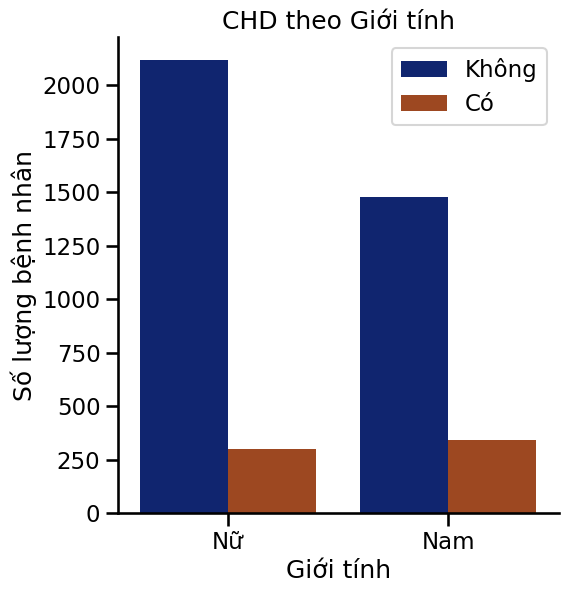

In [55]:
#Trực quan: CHD theo giới tính
sns.catplot(x='male', hue='CHD', data=df, kind='count', palette='dark', height=6, legend=False)
plt.xlabel('Giới tính')
plt.xticks(ticks=[0,1], labels=['Nữ', 'Nam'])
plt.ylabel('Số lượng bệnh nhân')
plt.legend(['Không', 'Có'])
plt.title('CHD theo Giới tính')

**Nhận xét :**

- Biểu đồ phân tích đôi trên mô tả sự có / không của Bệnh Tim Mạch Mạch Vành (CHD) theo giới tính.


- Các nhận xét cho thấy chúng ta có số lượng người không mắc CHD quá nhiều.
    - **Không** : Khoảng 80 đến 90% nữ thuộc vào loại Không trong khi khoảng 60 đến 70% nam thuộc vào loại Không.
    - **Positive** : rong khi khoảng 10% nữ và nam mắc bệnh CHD.
    

- Từ đây, chúng ta có thể nói rằng bộ dữ liệu của chúng ta không cân bằng, với khoảng 80 đến 90% thuộc về loại Không và khoảng 10 đến 15% thuộc về loại Có.

Text(0.5, 1.0, 'Phân phối giá trị Nhịp Tim')

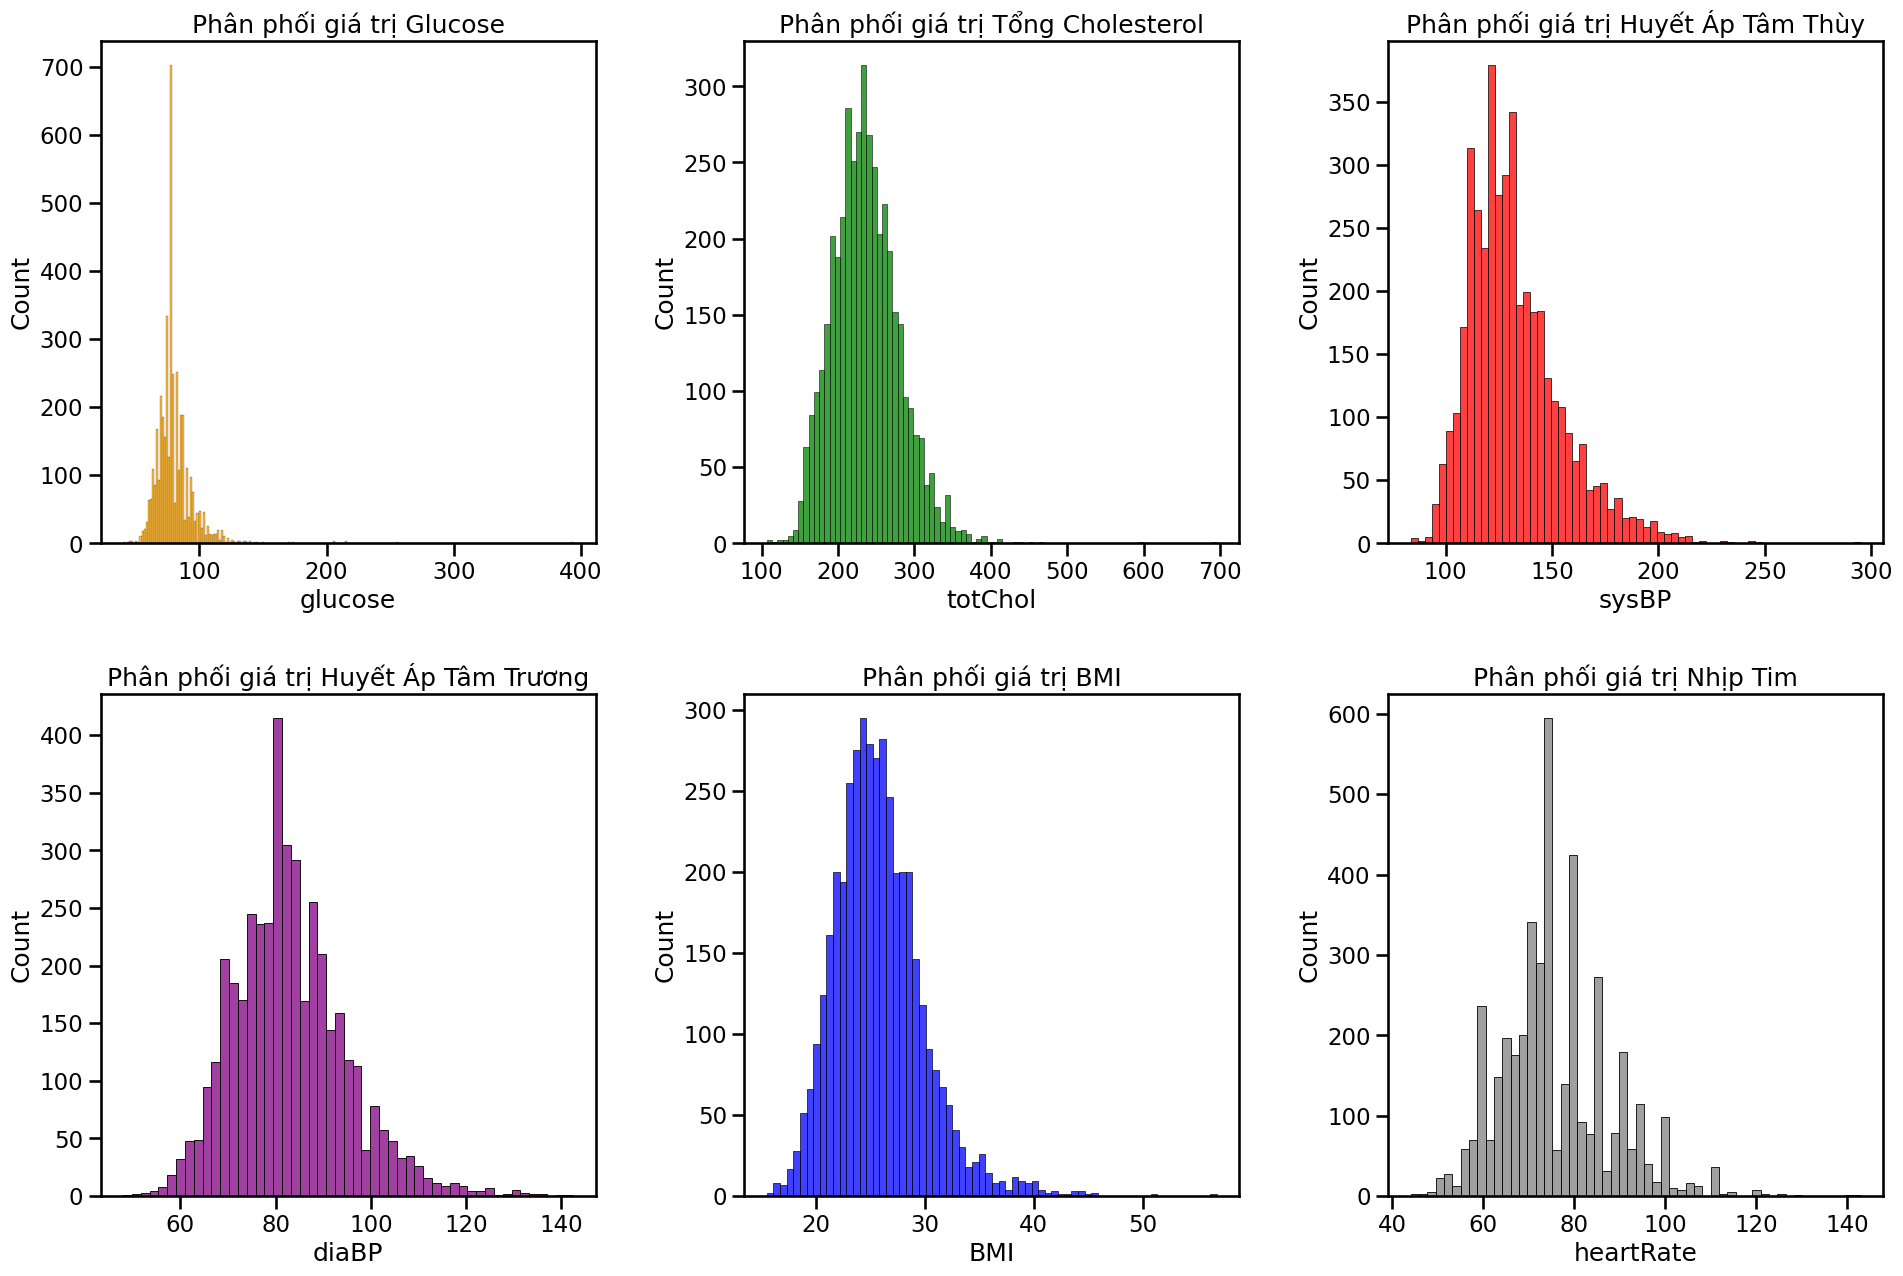

In [56]:
# Phân phối của các biến liên tục

plt.figure(figsize=(23,15))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(2, 3, 1)
sns.histplot(df['glucose'] , color='orange')
plt.title('Phân phối giá trị Glucose')

plt.subplot(2, 3, 2)
sns.histplot(df['totChol'], color='g')
plt.title('Phân phối giá trị Tổng Cholesterol')

plt.subplot(2, 3, 3)
sns.histplot(df['sysBP'], color='r')
plt.title('Phân phối giá trị Huyết Áp Tâm Thùy')

plt.subplot(2, 3, 4)
sns.histplot(df['diaBP'] , color='purple')
plt.title('Phân phối giá trị Huyết Áp Tâm Trương')

plt.subplot(2, 3, 5)
sns.histplot(df['BMI'], color='blue')
plt.title('Phân phối giá trị BMI')

plt.subplot(2, 3, 6)
sns.histplot(df['heartRate'], color='grey')
plt.title('Phân phối giá trị Nhịp Tim')

**Nhận xét :**

- Chúng ta có thể thấy **Glucose, Tổng Cholesterol, Huyết Áp Tâm Thùy & BMI** bị **Phân phối lệch phải.**


- Trong khi đó **Huyết Áp Tâm Trương & Nhịp Tim** gần giống với **Phân phối Chuẩn / Gaussian.**

Text(0.5, 1.0, 'Phân phối tuổi của bệnh nhân')

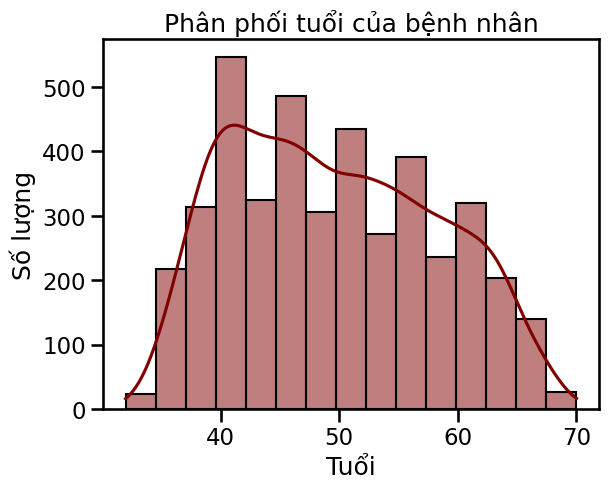

In [57]:
# Phân phối theo tuổi của bệnh nhân
sns.histplot(df['age'], bins=15, kde=True, color='maroon')
plt.xlabel('Tuổi')
plt.ylabel('Số lượng')
plt.title('Phân phối tuổi của bệnh nhân')

**Nhận xét :**

- Các đối tượng từ độ tuổi 40 đến 50 chiếm đa số, sau đó là từ 50 đến 70..


- Chúng ta hãy định nghĩa một hàm do người dùng tự định nghĩa để mã hóa tuổi.

In [58]:
#Định nghĩa hàm mã hóa tuổi

#Mã hóa tuổi
def encode_age(data):
    if data <= 40:
        return 0
    if data > 40 and data <=55:
        return 1
    else:
        return 2    

#Mã hóa giá trị nhịp tim
def heartrate_enc(data):
    if data <= 60:
        return 0
    if data > 60 and data <=100:
        return 1
    else:
        return 2

#áp dụng hàm mã hóa vào dữ liệu
df['enc_hr'] = df['heartRate'].apply(heartrate_enc)
df['encode_age'] = df['age'].apply(lambda x : encode_age(x))

- Các hàm trên sẽ mã hóa tuổi và nhịp tim.


- Chúng ta có thể mã hóa nhóm tuổi thêm:
    - Đối tượng có **Tuổi(Age) <= 40** là **Người trưởng thành(Adults).**
    - Đối tượng có **Tuổi(Age) > 40 and <= 55** là **Người trưởng thành trung niên(Middle-Aged Adult).**
    - Đối tượng có **Tuổi(Age) > 55** sẽ thuộc vào danh mục **Người cao tuổi(Senior)**.


- Chúng ta sẽ mã hóa giá trị nhịp tim như sau:
    - Nhịp tim **<= 60** là **Thấp(Low / Resting)**.
    - Nhịp tim **từ 60 đến 100** được coi là **Bình Thường(Normal).**
    - Trong khi đó, Nhịp tim **trên 100** là **Cao(High).**

Text(0.5, 1.0, 'Số lương bệnh nhân theo nhóm tuổi')

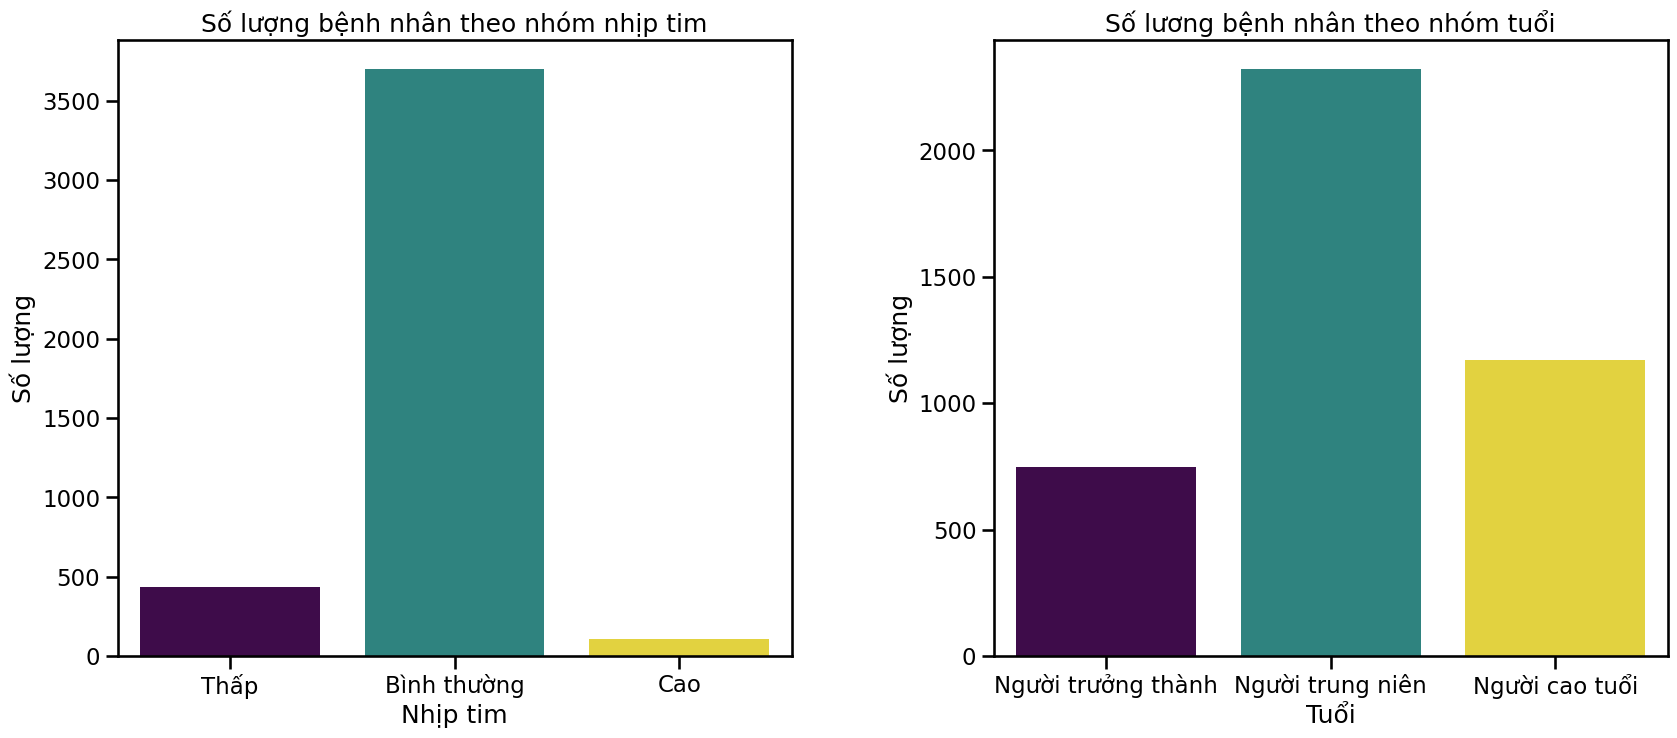

In [59]:
# Nhóm theo giá trị nhịp tim đã mã hóa

plt.figure(figsize=(20,8))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(1, 2, 1)
sns.countplot(x='enc_hr', data=df, palette='viridis', hue='enc_hr', legend=False)
plt.xlabel('Nhịp tim')
plt.ylabel('Số lượng')
plt.xticks([0,1,2], ['Thấp', 'Bình thường', 'Cao'])
plt.title('Số lượng bệnh nhân theo nhóm nhịp tim')

# Nhóm theo tuổi đã mã hóa

plt.subplot(1, 2, 2)
sns.countplot(x='encode_age', data=df, palette='viridis', hue='encode_age', legend=False)
plt.xlabel('Tuổi')
plt.ylabel('Số lượng')
plt.xticks(ticks=[0,1,2], labels=['Người trưởng thành', 'Người trung niên', 'Người cao tuổi'])
plt.title('Số lương bệnh nhân theo nhóm tuổi')  



- Chúng ta có thể thấy rằng các đối tượng có Nhịp Tim Bình Thường chiếm đa số, tiếp theo là Nhịp Tim Thấp và Nhịp Tim Cao.

- Chúng ta có số lượng Người Trưởng Thành Trung Niên nhiều hơn trong bộ dữ liệu của mình, tiếp theo là Người Cao Tuổi và sau đó là Người Trưởng Thành.

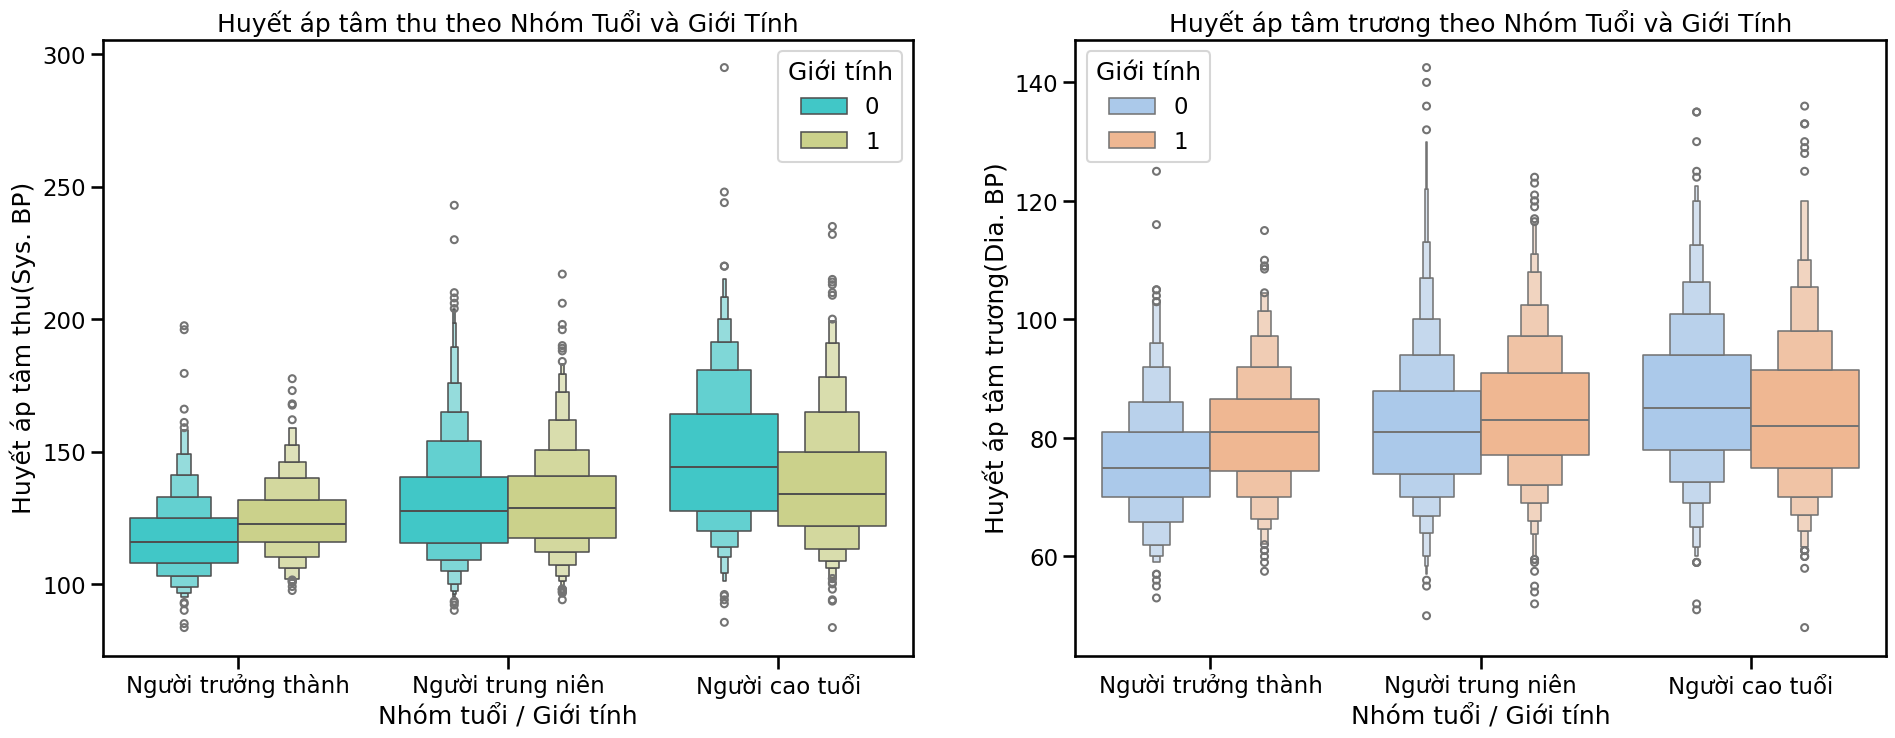

In [60]:
# Phân tích đa biến P1

plt.figure(figsize=(23,8))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

plt.subplot(1, 2, 1)
sns.boxenplot(x='encode_age', y='sysBP', hue='male', data=df, palette='rainbow')
plt.xlabel('Nhóm tuổi / Giới tính')
plt.ylabel('Huyết áp tâm thu(Sys. BP)')
plt.xticks(ticks=[0,1,2], labels=['Người trưởng thành', 'Người trung niên', 'Người cao tuổi'])
plt.title('Huyết áp tâm thu theo Nhóm Tuổi và Giới Tính')
plt.legend(title='Giới tính')

plt.subplot(1, 2, 2)
sns.boxenplot(x='encode_age', y='diaBP', hue='male', data=df, palette='pastel')
plt.xlabel('Nhóm tuổi / Giới tính')
plt.ylabel('Huyết áp tâm trương(Dia. BP)')
plt.xticks(ticks=[0,1,2], labels=['Người trưởng thành', 'Người trung niên', 'Người cao tuổi'])
plt.title('Huyết áp tâm trương theo Nhóm Tuổi và Giới Tính')
plt.legend(title='Giới tính')

**Nhận xét :**

- **Huyết áp Tâm thu theo Nhóm Tuổi & Giới tính** : Huyết áp tâm thu tăng theo nhóm tuổi và giới tính.


- **Huyết áp Tâm trương theo Nhóm Tuổi & Giới tính** :Tương tự như huyết áp tâm thu, huyết áp tâm trương cũng tăng theo nhóm tuổi và giới tính.


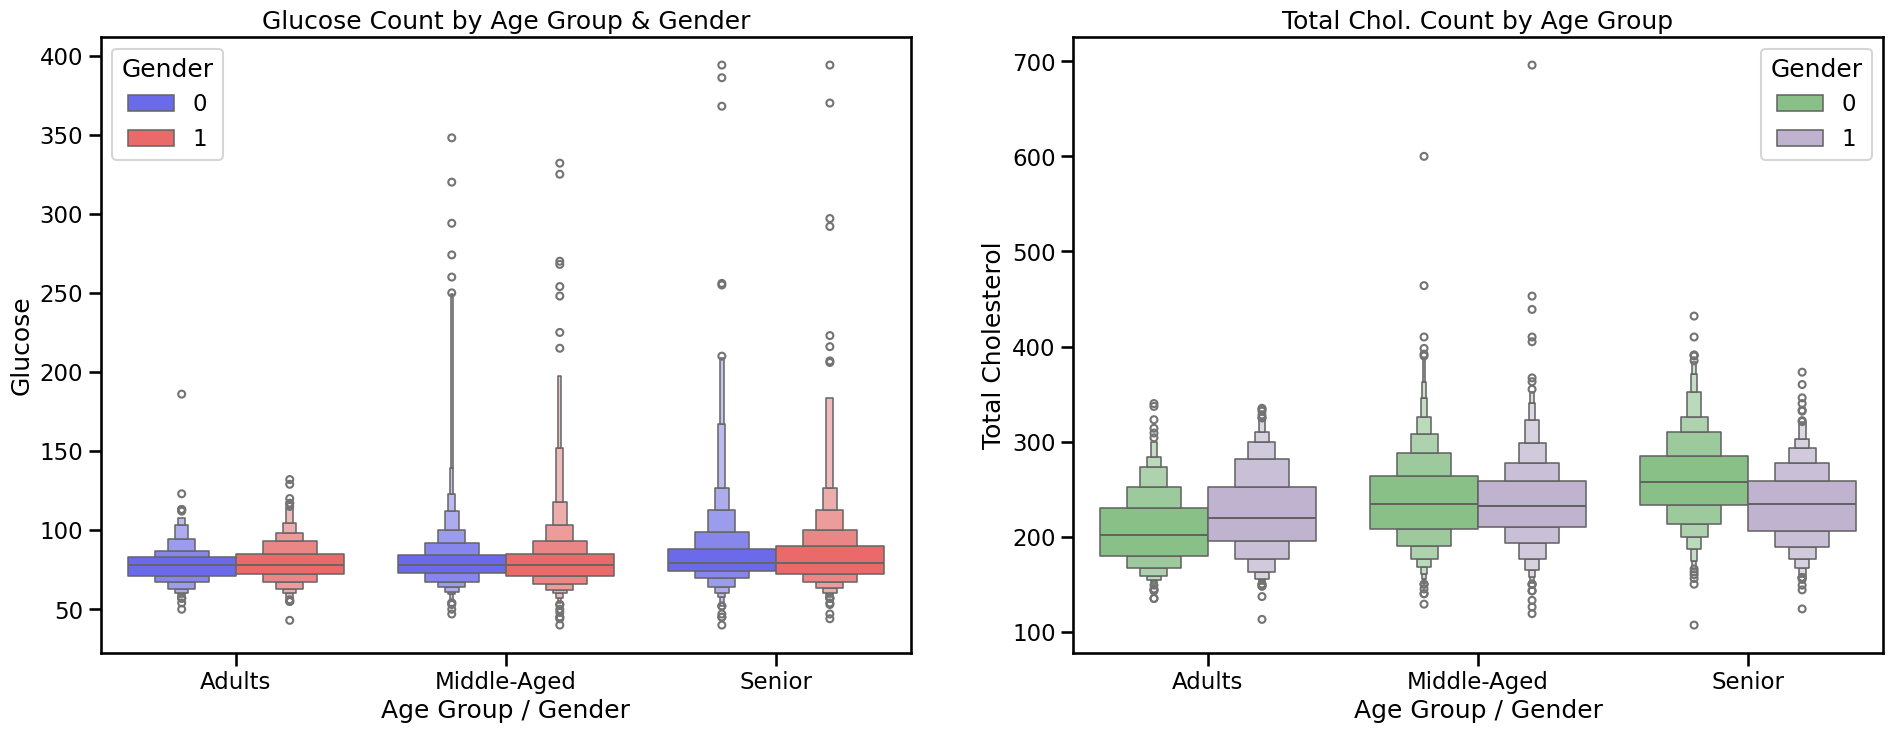

In [61]:
#Phân tích đa biến P2

plt.figure(figsize=(23,8))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

plt.subplot(1, 2, 1)
sns.boxenplot(x='encode_age', y='glucose', hue='male', data=df, palette='seismic')
plt.xlabel('Age Group / Gender')
plt.ylabel('Glucose')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Glucose Count by Age Group & Gender')
plt.legend(title='Gender')

plt.subplot(1, 2, 2)
sns.boxenplot(x='encode_age', y='totChol', hue='male', data=df, palette='Accent')
plt.xlabel('Age Group / Gender')
plt.ylabel('Total Cholesterol')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Total Chol. Count by Age Group')
plt.legend(title='Gender')

**Nhận xét :**

- **Số lượng Glucose theo Nhóm Tuổi & Giới tính** : Chúng ta có thể rõ ràng quan sát rằng khi tuổi tăng, số lượng Glucose cũng tăng theo. Trong khi đó, theo giới tính, số lượng Glucose có trung vị gần như tương tự với một vài giá trị ngoại lai trong mỗi nhóm.


- **Số lượng Tổng Cholesterol theo Nhóm Tuổi & Giới tính** : Loại trừ các giá trị ngoại lai, nhận xét cho chúng ta thấy rõ rằng đối với nữ giới, mức cholesterol tăng theo tuổi khi xem xét các giá trị phần vị (25%, 50%, 75%). Trong khi đó, đối với nam giới, các giá trị phần vị của mức cholesterol gần như tương tự cho mỗi nhóm tuổi.

Text(0.5, 1.0, 'Cigs. per day by Age Group')

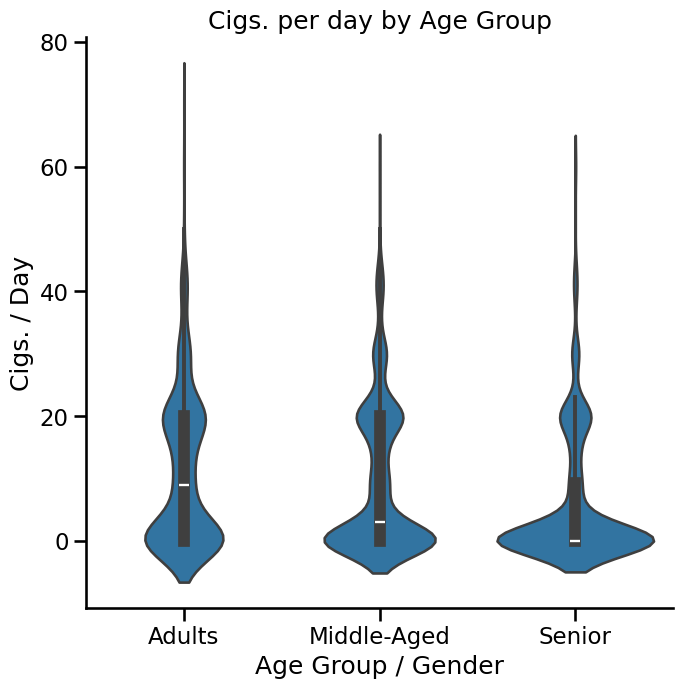

In [62]:
#Violin Plot of Cigsperday by age group

sns.catplot(data=df, x='encode_age', y='cigsPerDay', kind='violin', height=7)
plt.xlabel('Age Group / Gender')
plt.ylabel('Cigs. / Day')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Cigs. per day by Age Group')

**Nhận xét :**

- **Người trưởng thành** : Trong nhóm Người trưởng thành, chúng ta có thể thấy rằng giá trị trung vị có mật độ Kernel thấp hơn, tiếp theo là mật độ tại khoảng phân vị 75% của IQR. Trong khi đó, khoảng phân vị 25% của IQR có mật độ Kernel cao hơn.

- **Người trung niên** : Trong nhóm Người trung niên, chúng ta quan sát thấy rằng khoảng phân vị 25% của IQR và giá trị trung vị có mật độ Kernel cao hơn, trong khi khoảng phân vị 75% của IQR có mật độ Kernel khá thấp.


- **Người cao tuổi** : Trong nhóm Người cao tuổi, chúng ta quan sát rằng giá trị trung vị và khoảng phân vị 25% của IQR gần nhau và có mật độ Kernel cao, trong khi khoảng phân vị 75% của IQR có mật độ Kernel thấp.



Text(0.5, 1.0, 'Diabetes by Age Group')

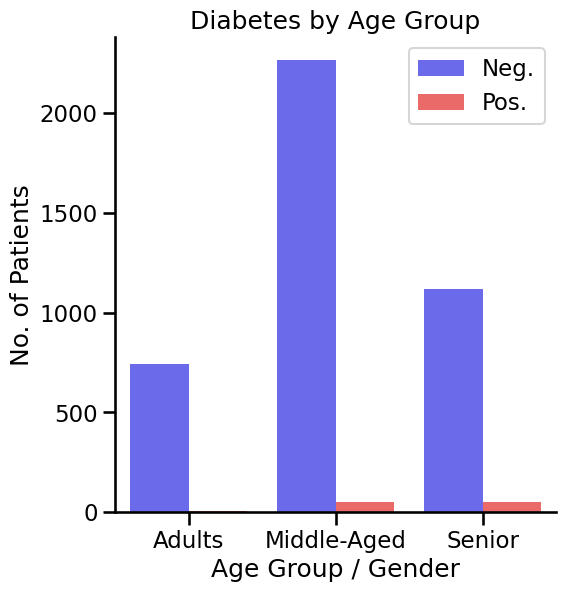

In [63]:
#Diabetes by Age Group

sns.catplot(x='encode_age', hue='diabetes', data=df, kind='count', palette='seismic', height=6, legend=False)
plt.xlabel('Age Group / Gender')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.ylabel('No. of Patients')
plt.legend(['Neg.', 'Pos.'])
plt.title('Diabetes by Age Group')

**Nhận xét :**

- **Người trưởng thành** : Số lượng người được chẩn đoán không mắc bệnh tiểu đường khoảng 800, trong khi số lượng người được chẩn đoán mắc bệnh tiểu đường gần như không đáng kể.


- **Người trung niên** : Số lượng người được chẩn đoán không mắc bệnh tiểu đường đạt đỉnh khoảng 2500, trong khi số lượng người được chẩn đoán mắc bệnh dưới 100.


- **Người cao tuổi** : Số lượng người được chẩn đoán không mắc bệnh tiểu đường khoảng 1000, trong khi số lượng người được chẩn đoán mắc bệnh dưới 100.

Text(0.5, 1.0, 'Target Class Count')

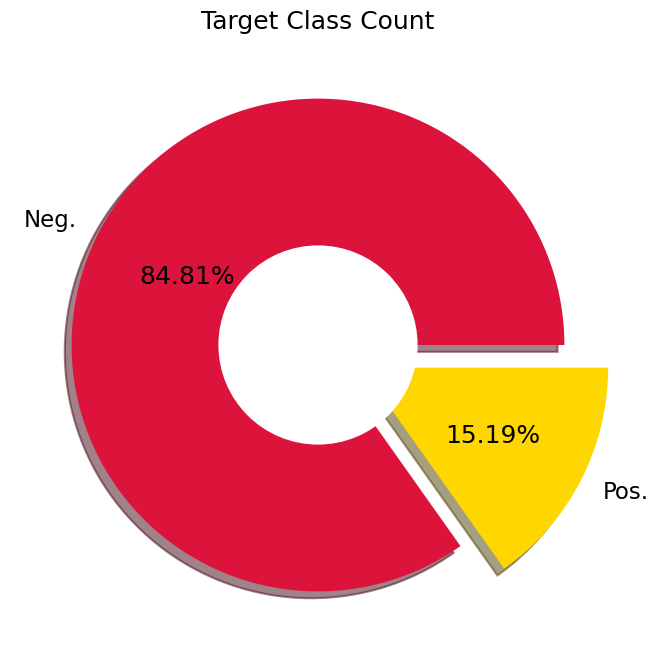

In [64]:
#Target Class count

plt.figure(figsize=(8,8))
plt.pie(df['CHD'].value_counts(), labels=['Neg.','Pos.'], autopct='%1.2f%%', explode=[0,0.2], shadow=True, colors=['crimson','gold'])
my_circle = plt.Circle( (0,0), 0.4, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Target Class Count')

**Nhận xét :**

- Chúng ta có thể thấy rằng bộ dữ liệu không cân bằng với tỷ lệ 85:15, trong đó lớp có bệnh là nhỏ.

- Chúng ta sẽ cần tăng mẫu cho bộ dữ liệu trong trường hợp này để đạt hiệu quả tốt nhất.


- Tuy nhiên, trước khi tiến hành tăng mẫu, chúng ta sẽ thử mô hình hồi quy Logistic cơ bản trên dữ liệu đã được xử lý.

In [65]:
#Making a copy of Dataset

df_copy = df.copy()

print(df_copy.shape)

(4240, 18)


In [66]:
#Reading data

df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHD,enc_hr,encode_age
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,1,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,1,1
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,1,1
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,1,2
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,1,1


In [67]:
#Log Transform Continuous Variables

#Log Transform Continuous Variables

df_copy['log_cigsPerDay'] = np.log1p(df_copy['cigsPerDay'])
df_copy['log_totChol'] = np.log1p(df_copy['totChol'])
df_copy['log_sysBP'] = np.log1p(df_copy['sysBP'])
df_copy['log_diaBP'] = np.log1p(df_copy['diaBP'])
df_copy['log_BMI'] = np.log1p(df_copy['BMI'])
df_copy['log_heartRate'] = np.log1p(df_copy['heartRate'])
df_copy['log_glucose'] = np.log1p(df_copy['glucose'])
df_copy['log_age'] = np.log1p(df_copy['age'])

df_copy.drop(['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'age',
              'education', 'enc_hr', 'encode_age'], axis=1, inplace=True)

In [68]:
df_copy

,male,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,CHD,log_cigsPerDay,log_totChol,log_sysBP,log_diaBP,log_BMI,log_heartRate,log_glucose,log_age
0,1,0,0.0,0,0,0,0,0.000000,5.278115,4.672829,4.262680,3.331133,4.394449,4.356709,3.688879
1,0,0,0.0,0,0,0,0,0.000000,5.525453,4.804021,4.406719,3.392157,4.564348,4.343805,3.850148
2,1,1,0.0,0,0,0,0,3.044522,5.505332,4.855929,4.394449,3.271089,4.330733,4.262680,3.891820
3,0,1,0.0,0,1,0,1,3.433987,5.420535,5.017280,4.564348,3.387098,4.189655,4.644391,4.127134
4,0,1,0.0,0,0,0,0,3.178054,5.655992,4.875197,4.442651,3.182212,4.454347,4.454347,3.850148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,1,0.0,0,0,0,0,3.044522,5.517453,4.882802,4.290459,3.135494,4.442651,4.465908,3.891820
4236,0,1,0.0,0,0,0,0,2.772589,5.351858,4.848116,4.477337,3.003700,4.465908,4.369448,3.806662
4237,0,0,0.0,0,0,0,0,0.000000,5.598422,4.901564,4.430817,3.112181,4.394449,4.682131,3.970292
4238,1,0,0.0,0,1,0,0,0.000000,5.225747,4.955827,4.595120,3.280911,4.219508,4.290459,3.713572


**Nhận xét :**

- Chúng ta đã thực hiện **Chuyển đổi Logarit** để loại bỏ các giá trị ngoại lai trong các biến liên tục.
- Ngoài ra, chúng ta đang **loại bỏ các đặc trưng** mà chúng ta đã thực hiện Chuyển đổi Logarit.
- Chúng ta cũng đang **loại bỏ "Education"** vì nó là một đặc trưng không cần thiết ở đây.

In [69]:
#Normalizing dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols = df_copy.drop(['CHD'], axis=1).columns

norm_df = scaler.fit_transform(df_copy.drop(['CHD'], axis=1))
norm_df = pd.DataFrame(data=norm_df, columns=cols, index=df_copy.drop(['CHD'], axis=1).index)                     
norm_df.head()

print(norm_df.shape)

(4240, 14)


**Nhận xét :**

- Chúng ta đã chuẩn hóa dữ liệu bằng cách sử dụng **Standard Scaler** để chuẩn hóa bộ dữ liệu.
  
- Và chúng ta đã tạo ra bộ dữ liệu mới là `norm_df`.
  
- Chúng ta đang loại bỏ một số đặc trưng ở đây vì chúng có tương quan dương (như chúng ta đã thấy trong biểu đồ tương quan).

### Building Model

- Trong phần này, chúng ta sẽ chia bộ dữ liệu thành tập Huấn luyện và tập Kiểm tra.

- Chúng ta sẽ xây dựng một mô hình Hồi quy Logistic cơ bản trên dữ liệu hiện có.

In [70]:
#train-test split
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

X = norm_df
y = df_copy['CHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3392, 14), (848, 14), (3392,), (848,))

- Hiện tại, chúng ta có 3392 bản ghi cho tập Huấn luyện và 848 bản ghi cho tập Đánh giá / Kiểm tra.

- Tiếp theo, chúng ta sẽ sử dụng Hồi quy Logistic làm Bộ ước lượng (Estimator).

### Logistic Regression

- **Hồi quy Logistic** luôn là phương pháp tốt nhất trước khi chuyển sang các thuật toán phức tạp.

- Trong hầu hết các trường hợp, nếu chúng ta thực hiện tốt kỹ thuật đặc trưng, thì các thuật toán đơn giản như Hồi quy Logistic có thể cho kết quả khá chấp nhận được.

- Chúng ta sẽ chọn bộ giải trình là "liblinear" vì bộ dữ liệu của chúng ta không lớn để thử các bộ giải trình khác, nên chúng ta sẽ sử dụng "liblinear".

In [71]:
class LogisticRegressionCustom:
    def __init__(self, learning_rate=0.01, epochs=1000, random_state=0):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.random_state = random_state
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, y_true, y_pred):
        return -np.mean(y_true * np.log(y_pred + 1e-9) + 
                        (1 - y_true) * np.log(1 - y_pred + 1e-9))

    def compute_gradient(self, x, y_true, y_pred):
        dw = np.dot(x.T, (y_pred - y_true)) / x.shape[0]
        db = np.mean(y_pred - y_true)
        return dw, db

    def update_parameters(self, weights, bias, dw, db):
        weights -= self.learning_rate * dw
        bias -= self.learning_rate * db
        return weights, bias

    def fit(self, x_train, y_train):
        np.random.seed(self.random_state)
        self.weights = np.random.randn(x_train.shape[1])
        self.bias = 0

        for epoch in range(self.epochs):
            linear_model = np.dot(x_train, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)
            loss = self.compute_loss(y_train, y_pred)
            dw, db = self.compute_gradient(x_train, y_train, y_pred)
            self.weights, self.bias = self.update_parameters(self.weights, self.bias, dw, db)
            # In loss mỗi 100 epochs
            if (epoch+1) % 100 == 0:
                print(f'Epoch {epoch+1}/{self.epochs} - Loss: {loss:.4f}')

    def predict_prob(self, x):
        linear_model = np.dot(x, self.weights) + self.bias
        return self.sigmoid(linear_model)

    def predict(self, x, threshold=0.5):
        y_pred_prob = self.predict_prob(x)
        return (y_pred_prob >= threshold).astype(int)

In [72]:
log_reg = LogisticRegressionCustom()
log_reg.fit(X_train, y_train)

log_pred = log_reg.predict(X_test)
print(log_pred[:20])

Epoch 100/1000 - Loss: 1.2615
Epoch 200/1000 - Loss: 1.0598
Epoch 300/1000 - Loss: 0.8991
Epoch 400/1000 - Loss: 0.7773
Epoch 500/1000 - Loss: 0.6889
Epoch 600/1000 - Loss: 0.6263
Epoch 700/1000 - Loss: 0.5823
Epoch 800/1000 - Loss: 0.5513
Epoch 900/1000 - Loss: 0.5289
Epoch 1000/1000 - Loss: 0.5123
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]


Accuracy Score : 0.8195754716981132
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       725
           1       0.30      0.18      0.22       123

    accuracy                           0.82       848
   macro avg       0.58      0.55      0.56       848
weighted avg       0.79      0.82      0.80       848

[[673  52]
 [101  22]]


<Axes: >

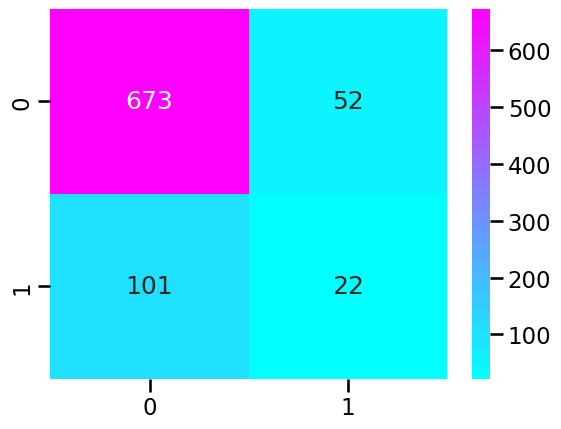

In [73]:
#Metrics Evaluation

print ('Accuracy Score :', accuracy_score(y_test, log_pred))
print (classification_report(y_test, log_pred))
print(confusion_matrix(y_test, log_pred))

sns.heatmap(confusion_matrix(y_test, log_pred), annot=True, cmap='cool', fmt='d')

**Hiểu về Các Chỉ số Đánh Giá:**

- **Chỉ số Độ chính xác (Accuracy Score)**: Chỉ số Độ chính xác trong bộ dữ liệu không cân bằng có thể là một cái bẫy.
  
  - **Tại sao Độ chính xác không phải là Chỉ số Đánh giá của chúng ta?**
  
  - **Trả lời:** Chúng ta có ảo giác về Độ chính xác cao vì bộ ước lượng của chúng ta học tốt từ Lớp đa số và có khả năng dự đoán tốt trên Lớp đa số nhưng không phải Lớp thiểu số, làm cho chúng ta có ảo giác về Độ chính xác cao. Độ chính xác 0.8195dường như là tốt nhưng nó không có giá trị vì chúng ta có thể quan sát (tham khảo Ma trận Nhầm lẫn) rằng chúng ta đang có sự sai phân loại ở Lớp thiểu số.

- **Báo cáo Phân loại (Classification Report)**: Trong Báo cáo Phân loại, các chỉ số quan trọng của chúng ta là Precision (TP/TP + FP) và Recall (TP/TP + FN). Chúng ta có thể thấy Chỉ số Recall của chúng ta chỉ tốt đối với Lớp âm tính nhưng Lớp Dương tính có Chỉ số Recall kém.

- **Ma trận Nhầm lẫn (Confusion Matrix)**: Các giá trị đường chéo của Ma trận Nhầm lẫn là chính xác. Vì vậy, chúng ta có thể thấy rằng trong chẩn đoán âm tính, trong số 725 trường hợp, 673 được phân loại chính xác trong khi chỉ có 52 trường hợp bị phân loại sai, chúng ta cũng có thể gọi đó là **Lỗi Loại 1 (Type 1 Error)**. Trong khi đó, trong trường hợp chẩn đoán dương tính, trong số 123 ví dụ, 22 được phân loại chính xác trong khi phần còn lại 101 bị phân loại sai thành Lớp âm tính.

In [74]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


log_pred = log_reg.predict(X_test)
print(log_pred[:20])

# Accuracy Score
print ('Accuracy Score :', accuracy_score(y_test, log_pred))
# Metrics Evaluation
print(confusion_matrix(y_test, log_pred))
# sns.heatmap(confusion_matrix(y_test, log_pred), annot=True, cmap='cool', fmt='d')
# Classification Report
print(classification_report(y_test, log_pred))


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Accuracy Score : 0.8573113207547169
[[720   5]
 [116   7]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       725
           1       0.58      0.06      0.10       123

    accuracy                           0.86       848
   macro avg       0.72      0.53      0.51       848
weighted avg       0.82      0.86      0.80       848




### **Nhận Định:**

- **Tương Đồng:** 
- Cả hai cài đặt (tự triển khai và sử dụng thư viện [sklearn](http://_vscodecontentref_/0)) đều đạt cùng một kết quả, cho thấy cài đặt tự triển khai đã được thực hiện chính xác.

- **Hiệu Suất Mô Hình:**
- **Accuracy cao (85.73%)** nhưng **Recall thấp cho lớp 1 (6%)**, cho thấy mô hình gặp khó khăn trong việc phát hiện các trường hợp mắc bệnh tim.
- **Precision và F1-score cho lớp 1 cũng thấp (58% và 10% tương ứng)**, điều này có thể do **dữ liệu mất cân bằng** giữa các lớp.

### **Khuyến Nghị:**

- **Xử Lý Dữ Liệu Mất Cân Bằng:**
- Sử dụng các kỹ thuật như **resampling (over-sampling hoặc under-sampling)**, **SMOTE**, hoặc **cân bằng trọng số lớp** trong mô hình.

- **Tối Ưu Hóa Mô Hình:**
- **Điều chỉnh siêu tham số** của mô hình Logistic Regression.
- **Thử các thuật toán khác** như **Random Forest**, **Gradient Boosting**, hoặc **SVM** để cải thiện hiệu suất.

- **Đánh Giá Bằng Các Chỉ Số Khác:**
- Sử dụng **ROC-AUC**, **PR-AUC** để có cái nhìn toàn diện hơn về hiệu suất mô hình, đặc biệt khi làm việc với dữ liệu mất cân bằng.

Nếu cần hỗ trợ thêm về việc cải thiện mô hình hoặc xử lý dữ liệu, hãy cho biết!

### Cải thiện mô hình

Mục đích của việc cải thiện mô hình:
- Độ chính xác: Đây là chỉ số cơ bản để đánh giá mức độ mô hình đúng trong việc phân loại các mẫu dữ liệu. Tăng độ chính xác giúp giảm số lượng dự đoán sai, từ đó cải thiện độ tin cậy của mô hình.
- Recall của lớp 1: Trong nhiều bài toán, đặc biệt là y tế như Dự Đoán Bệnh Tim Mạch, lớp 1 là lớp dương tính (có bệnh). Tăng recall của lớp 1 giúp giảm số lượng bỏ sót (False Negatives), quan trọng trong việc phát hiện sớm các bệnh lý nguy hiểm, từ có có thể can thiệp kịp thời.
- Ma trận nhầm lẫn: Giúp nhận diện các điểm mạnh và điểm yếu của mô hình trong việc phân loại từng lớp. Phân tích ma trận nhầm lẫn giúp điều chỉnh mô hình để tối ưu hóa các chỉ số như precision và recall. Giảm số lượng FP và FN để cải thiện tổng thể hiệu suất và độ tin cậy của mô hình.

#### Áp dụng trọng số lớp cho mô hình

- Dữ liệu ban đầu không cần bằng khiến cho mô hình dự đoán hoạt động không chính xác (kết quả dự đoán đa số nghiên về Âm tính). Chúng ta cải thiện mô hình để có thể xử lý dữ liệu không cân bằng bằng cách áp dụng trọng số lớp.
- Trong bài toán phân loại, đặc biệt là khi đối mặt với dữ liệu không cân bằng (imbalanced datasets), việc sử dụng trọng số lớp là một kỹ thuật quan trọng để cải thiện hiệu suất mô hình. Trọng số lớp giúp mô hình chú trọng hơn vào các lớp thiểu số, giảm thiểu việc bỏ sót (false negatives) và tăng khả năng phát hiện các lớp quan trọng.
- Trong lớp tùy chỉnh `LogisticRegressionCustomBalanced`, trọng số lớp được áp dụng để xử lý vấn đề dữ liệu không cân bằng bằng cách điều chỉnh hàm mất mát và gradient dựa trên tần suất của từng lớp.

In [75]:
# class LogisticRegressionCustomBalanced():
#     def __init__(self, learning_rate=0.01, epochs=1000, random_state=0):
#         self.learning_rate = learning_rate
#         self.epochs = epochs
#         self.random_state = random_state
#         self.weights = None
#         self.bias = None
#         self.weights_class = None

#     def sigmoid(self, z):
#         return 1 / (1 + np.exp(-z))

#     '''
#     Nhân trọng số lớp với cross-entropy loss cho từng mẫu. 
#     Điều này làm tăng tầm quan trọng của các lớp thiểu số trong quá trình huấn luyện.
#     '''
#     def compute_loss(self, y_true, y_pred):
#         loss = -np.mean(self.weights_class[y_true.astype(int)] * 
#                         (y_true * np.log(y_pred + 1e-9) + 
#                         (1 - y_true) * np.log(1 - y_pred + 1e-9)))
#         return loss

#     '''
#     Gradient của hàm mất mát được điều chỉnh bằng trọng số lớp, 
#     giúp cập nhật trọng số mô hình một cách phù hợp với tầm quan trọng của từng lớp.
#     '''
#     def compute_gradient(self, x, y_true, y_pred):
#         errors = y_pred - y_true
#         weighted_errors = errors * self.weights_class[y_true.astype(int)]
#         dw = np.dot(x.T, weighted_errors) / x.shape[0]
#         db = np.mean(weighted_errors)
#         return dw, db

#     def update_parameters(self, weights, bias, dw, db):
#         weights -= self.learning_rate * dw
#         bias -= self.learning_rate * db
#         return weights, bias

#     def fit(self, x_train, y_train):
#         np.random.seed(self.random_state)
#         self.weights = np.random.randn(x_train.shape[1])
#         self.bias = 0
        
#         # Tính trọng số cho mỗi lớp
#         classes, counts = np.unique(y_train, return_counts=True) # Tìm các lớp duy nhất và đếm số lượng mẫu trong mỗi lớp.
#         total = len(y_train)
#         self.weights_class = {}
#         for cls, count in zip(classes, counts):
#             self.weights_class[cls] = total / (len(classes) * count) # Tính trọng số cho mỗi lớp bằng cách lấy tổng số mẫu chia cho (số lớp × số mẫu trong lớp hiện tại).
        
#         # Tạo một mảng trọng số tương ứng với từng mẫu trong dữ liệu huấn luyện.
#         self.weights_class = np.array([self.weights_class[cls] for cls in y_train])

#         for epoch in range(self.epochs):
#             # Dự đoán
#             linear_model = np.dot(x_train, self.weights) + self.bias
#             y_pred = self.sigmoid(linear_model)

#             # Tính toán hàm loss
#             loss = self.compute_loss(y_train, y_pred)

#             # Tính gradient
#             dw, db = self.compute_gradient(x_train, y_train, y_pred)

#             # Cập nhật trọng số và bias
#             self.weights, self.bias = self.update_parameters(self.weights, self.bias, dw, db)

#             # In loss mỗi 100 epochs
#             if (epoch+1) % 100 == 0:
#                 print(f'Epoch {epoch+1}/{self.epochs} - Loss: {loss:.4f}')

#     def predict_proba(self, x):
#         linear_model = np.dot(x, self.weights) + self.bias
#         return self.sigmoid(linear_model)

#     def predict(self, x, threshold=0.5):
#         y_pred_prob = self.predict_proba(x)
#         return (y_pred_prob >= threshold).astype(int)
from logistic_regression_custom_balanced import LogisticRegressionCustomBalanced 

In [76]:
log_reg_balanced = LogisticRegressionCustomBalanced(learning_rate=0.001, epochs=5000)
log_reg_balanced.fit(X_train, y_train)

Epoch 100/5000 - Loss: 0.8770
Epoch 200/5000 - Loss: 0.8681
Epoch 300/5000 - Loss: 0.8593
Epoch 400/5000 - Loss: 0.8505
Epoch 500/5000 - Loss: 0.8418
Epoch 600/5000 - Loss: 0.8332
Epoch 700/5000 - Loss: 0.8247
Epoch 800/5000 - Loss: 0.8162
Epoch 900/5000 - Loss: 0.8078
Epoch 1000/5000 - Loss: 0.7995
Epoch 1100/5000 - Loss: 0.7912
Epoch 1200/5000 - Loss: 0.7831
Epoch 1300/5000 - Loss: 0.7750
Epoch 1400/5000 - Loss: 0.7670
Epoch 1500/5000 - Loss: 0.7591
Epoch 1600/5000 - Loss: 0.7512
Epoch 1700/5000 - Loss: 0.7435
Epoch 1800/5000 - Loss: 0.7358
Epoch 1900/5000 - Loss: 0.7282
Epoch 2000/5000 - Loss: 0.7207
Epoch 2100/5000 - Loss: 0.7132
Epoch 2200/5000 - Loss: 0.7059
Epoch 2300/5000 - Loss: 0.6986
Epoch 2400/5000 - Loss: 0.6914
Epoch 2500/5000 - Loss: 0.6843
Epoch 2600/5000 - Loss: 0.6773
Epoch 2700/5000 - Loss: 0.6704
Epoch 2800/5000 - Loss: 0.6635
Epoch 2900/5000 - Loss: 0.6568
Epoch 3000/5000 - Loss: 0.6501
Epoch 3100/5000 - Loss: 0.6435
Epoch 3200/5000 - Loss: 0.6370
Epoch 3300/5000 -

[0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0]
Accuracy Score : 0.7004716981132075
              precision    recall  f1-score   support

           0       0.91      0.72      0.80       725
           1       0.26      0.59      0.36       123

    accuracy                           0.70       848
   macro avg       0.59      0.65      0.58       848
weighted avg       0.82      0.70      0.74       848



<Axes: >

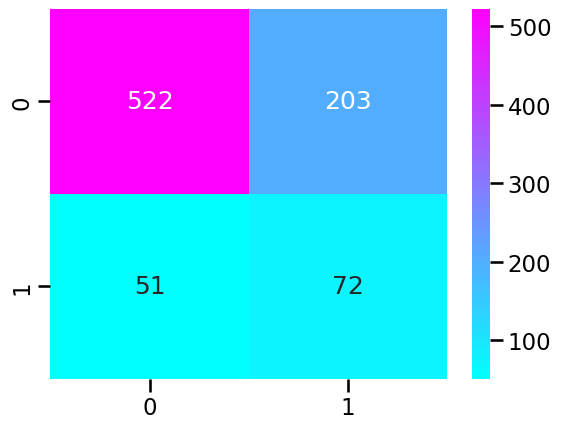

In [77]:
log_pred_balanced = log_reg_balanced.predict(X_test)
print(log_pred_balanced[:20])

print ('Accuracy Score :', accuracy_score(y_test, log_pred_balanced))
print (classification_report(y_test, log_pred_balanced))

sns.heatmap(confusion_matrix(y_test, log_pred_balanced), annot=True, cmap='cool', fmt='d')

**Nhận xét :**
- **Độ Chính Xác Cao Nhưng Không Đồng Bộ**: Mô hình có độ chính xác tổng thể khá tốt (70%), tuy nhiên, chỉ số Precision của lớp 1 rất thấp (26%), cho thấy nhiều False Positives.
- **Recall Tương Đối Đơn Sang**: Mô hình nhận diện đúng hơn 50% các trường hợp lớp 1, nhưng F1-Score thấp (0.36) phản ánh sự không cân bằng giữa Precision và Recall.
- **Dữ Liệu Không Cân Bằng**: Với số lượng mẫu lớp 0 lớn hơn nhiều so với lớp 1, mô hình thiên về dự đoán lớp 0, dẫn đến hiệu suất kém đối với lớp 1.

#### Áp dụng phương pháp tìm ngưỡng tối ưu

In [78]:
y_pred_proba = log_reg_balanced.predict_proba(X_test)

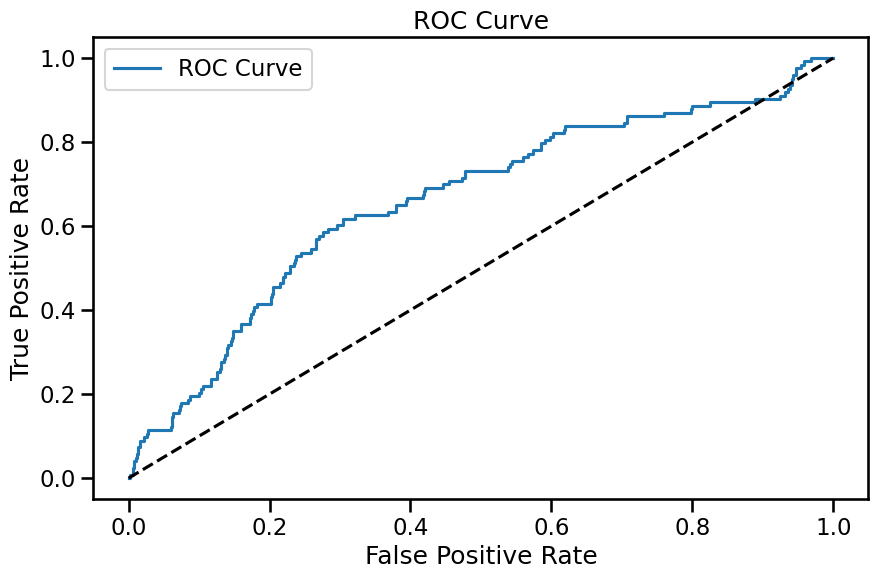

In [79]:
# Vẽ đường cong ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [80]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Ngưỡng tối ưu:", optimal_threshold)

Ngưỡng tối ưu: 0.4544913018460443


In [81]:
y_pred_threshold = (y_pred_proba >= optimal_threshold).astype(int)

In [82]:
print ('Accuracy Score :', accuracy_score(y_test, y_pred_threshold))
print (classification_report(y_test, y_pred_threshold))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_threshold))

Accuracy Score : 0.6839622641509434
              precision    recall  f1-score   support

           0       0.91      0.70      0.79       725
           1       0.26      0.62      0.36       123

    accuracy                           0.68       848
   macro avg       0.59      0.66      0.58       848
weighted avg       0.82      0.68      0.73       848

Confusion Matrix:
 [[504 221]
 [ 47  76]]


**Nhận xét :**
- **Độ Chính Xác Giảm**: Mặc dù độ chính xác tổng thể giảm từ 70.05% xuống còn 68.40%, điều này có thể do số lượng False Positives tăng từ 176 lên 221.
- **Cải Thiện về Recall của Lớp 1**: Recall của lớp 1 tăng từ 59% lên 62%, cho thấy mô hình đã cải thiện khả năng phát hiện các trường hợp thực sự thuộc lớp 1.
- **Precision của Lớp 1 Vẫn Thấp**: Precision vẫn chỉ ở mức 26%, tức là trong số các dự đoán lớp 1, chỉ 26% là đúng. Điều này phản ánh số lượng False Positives vẫn khá cao.
- **Ma Trận Nhầm Lẫn**:
    + Số False Positives tăng đáng kể từ 176 lên 221, dẫn đến tăng số lượng dự đoán sai cho lớp 0 thành lớp 1.
    + Số False Negatives giảm nhẹ từ 54 xuống 47, cho thấy mô hình ít bỏ sót hơn các trường hợp lớp 1.

#### Cân bằng dữ liệu

In [83]:
from collections import Counter
# from imblearn.over_sampling import ADASYN
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

from imblearn.under_sampling import TomekLinks
# Khởi tạo SMOTE
# smote = SMOTEENN(random_state=42)

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('tomek', TomekLinks())
])

# Áp dụng SMOTE lên tập huấn luyện
X_train_smote, y_train_smote = pipeline.fit_resample(X_train, y_train)

print("Số lượng các lớp sau khi cân bằng:", Counter(y_train_smote))

# tomek = TomekLinks()
# X_train_tomek, y_train_tomek = tomek.fit_resample(X_train_smote, y_train_smote)

# Huấn luyện mô hình với dữ liệu đã cân bằng
model_balanced = LogisticRegressionCustomBalanced(
    learning_rate=0.001,
    epochs=5000,
    random_state=0,
)
model_balanced.fit(X_train_smote, y_train_smote)

# Dự đoán xác suất
y_pred_proba_combined = model_balanced.predict_proba(X_test)

# Chọn ngưỡng tối ưu
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_combined)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Ngưỡng tối ưu:", optimal_threshold)

# Áp dụng ngưỡng mới
y_pred_threshold_combined = (y_pred_proba_combined >= optimal_threshold).astype(int)

# Đánh giá mô hình
print("Ma trận nhầm lẫn:\n", confusion_matrix(y_test, y_pred_threshold_combined))
print("\nBáo cáo phân loại:\n", classification_report(y_test, y_pred_threshold_combined))
print("Độ chính xác:", accuracy_score(y_test, y_pred_threshold_combined))

Số lượng các lớp sau khi cân bằng: Counter({0: 2871, 1: 2849})
Epoch 100/5000 - Loss: 1.3297
Epoch 200/5000 - Loss: 1.3172
Epoch 300/5000 - Loss: 1.3049
Epoch 400/5000 - Loss: 1.2928
Epoch 500/5000 - Loss: 1.2808
Epoch 600/5000 - Loss: 1.2689
Epoch 700/5000 - Loss: 1.2572
Epoch 800/5000 - Loss: 1.2457
Epoch 900/5000 - Loss: 1.2343
Epoch 1000/5000 - Loss: 1.2230
Epoch 1100/5000 - Loss: 1.2119
Epoch 1200/5000 - Loss: 1.2010
Epoch 1300/5000 - Loss: 1.1902
Epoch 1400/5000 - Loss: 1.1795
Epoch 1500/5000 - Loss: 1.1690
Epoch 1600/5000 - Loss: 1.1587
Epoch 1700/5000 - Loss: 1.1484
Epoch 1800/5000 - Loss: 1.1384
Epoch 1900/5000 - Loss: 1.1285
Epoch 2000/5000 - Loss: 1.1187
Epoch 2100/5000 - Loss: 1.1091
Epoch 2200/5000 - Loss: 1.0996
Epoch 2300/5000 - Loss: 1.0903
Epoch 2400/5000 - Loss: 1.0812
Epoch 2500/5000 - Loss: 1.0721
Epoch 2600/5000 - Loss: 1.0633
Epoch 2700/5000 - Loss: 1.0545
Epoch 2800/5000 - Loss: 1.0460
Epoch 2900/5000 - Loss: 1.0375
Epoch 3000/5000 - Loss: 1.0292
Epoch 3100/5000 

**Nhận xét :**
- Cân Bằng Giữa Precision và Recall: Trong khi Recall của lớp 1 đã cải thiện, Precision vẫn chưa đạt mức mong muốn, gây ra nhiều dự đoán sai cho lớp 1.
- False Positives (FP) Cao: Số lượng FP tăng lên từ các lần trước, có thể ảnh hưởng đến độ tin cậy của mô hình trong các ứng dụng y tế.
- Độ Chính Xác Tổng Thể: Mặc dù đạt 71%, nhưng cần xem xét các chỉ số khác như ROC-AUC và Precision-Recall AUC để đánh giá chính xác hơn.

**Nhận xét :**
- **Độ Chính Xác Cao Nhưng Không Đồng Bộ**: Mô hình có độ chính xác tổng thể khá tốt (70%), tuy nhiên, chỉ số Precision của lớp 1 rất thấp (26%), cho thấy nhiều False Positives.
- **Recall Tương Đối Đơn Sang**: Mô hình nhận diện đúng hơn 50% các trường hợp lớp 1, nhưng F1-Score thấp (0.36) phản ánh sự không cân bằng giữa Precision và Recall.
- **Dữ Liệu Không Cân Bằng**: Với số lượng mẫu lớp 0 lớn hơn nhiều so với lớp 1, mô hình thiên về dự đoán lớp 0, dẫn đến hiệu suất kém đối với lớp 1.

#### Đánh giá qua ROC Curve và PR Curve

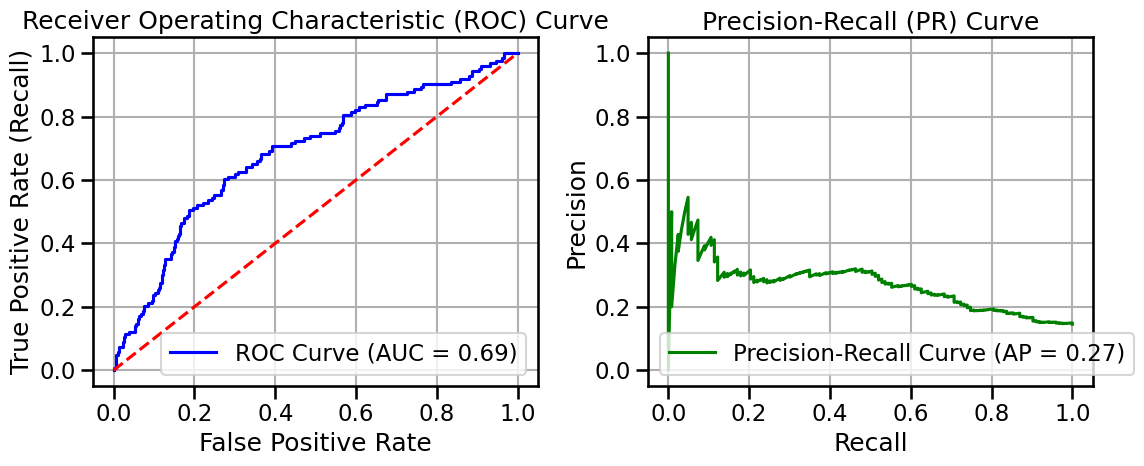

ROC-AUC Score: 0.69
Average Precision (AP) Score: 0.27


In [84]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

# Giả sử bạn đã có y_test và y_pred_proba_combined
# y_pred_threshold_combined là dự đoán nhãn dựa trên ngưỡng tối ưu

# Tính ROC Curve và AUC
fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_proba_combined)
roc_auc = roc_auc_score(y_test, y_pred_proba_combined)

# Tính Precision-Recall Curve và Average Precision
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_proba_combined)
average_precision = average_precision_score(y_test, y_pred_proba_combined)

# Vẽ ROC Curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)

# Vẽ Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='green', label=f'Precision-Recall Curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall (PR) Curve')
plt.legend(loc='lower left')
plt.grid(True)

plt.tight_layout()
plt.show()

# In ra các chỉ số
print(f"ROC-AUC Score: {roc_auc:.2f}")
print(f"Average Precision (AP) Score: {average_precision:.2f}")

**Nhận xét :**
- ROC-AUC và AP Thấp: Các chỉ số này cho thấy mô hình cần được cải thiện để nâng cao khả năng phân loại giữa các lớp.

#### Xây dựng ứng dụng


In [85]:
import pickle

with open('framingham_heart_disease_model.pkl', 'wb') as file:
    pickle.dump(model_balanced, file)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [86]:
X_test

,male,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,log_cigsPerDay,log_totChol,log_sysBP,log_diaBP,log_BMI,log_heartRate,log_glucose,log_age
1350,-0.867217,1.011863,-0.173569,-0.077014,-0.671241,-0.162437,0.703075,0.602481,-0.384255,-0.182594,-0.648574,-1.115112,-1.043578,0.016802
1434,1.153113,1.011863,-0.173569,-0.077014,-0.671241,-0.162437,1.288359,-0.794585,-0.488215,-0.007177,-0.442495,-0.440000,0.674392,-0.735419
2500,1.153113,1.011863,-0.173569,-0.077014,1.489778,-0.162437,-0.456842,0.946500,0.437161,0.164064,0.784286,-0.532260,-0.382357,-0.473847
1128,-0.867217,1.011863,-0.173569,-0.077014,1.489778,-0.162437,0.703075,0.076589,2.344089,1.614926,0.591412,-1.427373,-0.382357,1.469421
4144,1.153113,-0.988276,-0.173569,-0.077014,-0.671241,-0.162437,-0.928462,0.099544,0.039636,0.164064,-0.352566,1.174203,0.840369,1.089652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1844,1.153113,1.011863,-0.173569,-0.077014,-0.671241,-0.162437,0.958018,-0.931231,-1.237977,-1.493806,-0.779891,-3.263061,-0.048530,-1.916242
4178,1.153113,1.011863,-0.173569,-0.077014,-0.671241,-0.162437,1.408036,-0.556934,0.087707,0.248179,0.756736,-0.625846,-0.665854,-1.009160
4193,-0.867217,-0.988276,-0.173569,-0.077014,1.489778,-0.162437,-0.928462,1.487474,2.542864,1.751916,0.603187,0.002631,0.444464,1.469421
2897,-0.867217,-0.988276,-0.173569,-0.077014,-0.671241,-0.162437,-0.928462,1.195664,-0.332902,-0.881372,-0.333642,1.315603,0.444464,-0.473847
